In [109]:
import os
import pandas as pd
import sys, os
print(os.listdir())
os.chdir(r'C:\Users\vmukku\Desktop\TableauCourse\DSclasses')
print(os.listdir())
df_n=pd.read_csv('News_Data.csv',encoding='ISO-8859-1')

['.spyproject', '1749596_RTNS_20210312.zip', '1749596_Sett_12032021.zip', '6906080226278453252.mp4', 'ages.csv', 'B.csv', 'blood_pressure.csv', 'Day10_Hyp_test-20210312T205511Z-001.zip', 'Day11_ML_Intro-20210312T205513Z-001.zip', 'Day12_KNN_INtro-20210312T205517Z-001.zip', 'Day13_conf_matr-20210312T205830Z-001.zip', 'Day14_NaiveBayes', 'Day14_NaiveBayes-20210322T204305Z-001.zip', 'Day15_NaiveBayes-20210320T013517Z-001.zip', 'Day16_DecisionTree-20210320T013525Z-001.zip', 'Day17_Decision_Tree_impl-20210320T013558Z-001.zip', 'Day4_OOPs-20210312T205952Z-001.zip', 'Day5_statistics-20210312T205936Z-001.zip', 'Day6_dispersion-20210312T205933Z-001.zip', 'Day7_Plots_Shapes-20210312T204442Z-001.zip', 'Day8_Normalization-20210312T204501Z-001.zip', 'Day9_Infer_stats-20210312T204508Z-001.zip', 'Day9_Infer_stats-20210312T204520Z-001.zip', 'Decision_tree.csv', 'DescStat.py', 'Dispersion.pptx', 'Distributions.py', 'ex.xlsx', 'Hypothesis Testing.pptx', 'Infer Stat and Probability.pptx', 'Invoice - Adam

In [116]:
df_n.head()
df_n.shape

(4845, 2)

In [117]:
#df_n.columns=[0:'type',1:'text']
df_n.rename(columns = {'type':'Type','text':'Text'},inplace = True) 
#Sentiment Counts
#df_n.value_counts()
df_n.head()

,Type,Text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [119]:
#Removing Numbers
df_n['Text'] =  df_n['Text'].apply(lambda x:"".join(x for x in str(x) if not x.isdigit()))
df_n['Text'].head()

'1'.isdigit()

True

In [122]:
df_n.head(10)

,Type,Text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
5,positive,"For the last quarter of , Componenta 's net s..."
6,positive,"In the third quarter of , net sales increased..."
7,positive,Operating profit rose to EUR . mn from EUR . m...
8,positive,"Operating profit totalled EUR . mn , up from E..."
9,positive,TeliaSonera TLSN said the offer is in line wit...


In [123]:
#Example
st = 'abc123'
xyz = lambda x:"".join(x for x in str(x) if not x.isdigit())
xyz(st)

'abc'

In [138]:
grouped = df_n.groupby('Type')
text_nu = grouped.get_group('neutral')
text_nu.head()
grouped = df_n.groupby('Type')
text_pos = grouped.get_group('positive')
text_pos.head()
grouped = df_n.groupby('Type')
text_neg = grouped.get_group('negative')
text_neg.head()

,Type,Text
1,negative,The international electronic industry company ...
414,negative,A tinyurl link takes users to a scamming site ...
420,negative,"Compared with the FTSE index , which rose . p..."
422,negative,"Compared with the FTSE index , which rose . p..."
499,negative,One of the challenges in the oil production in...


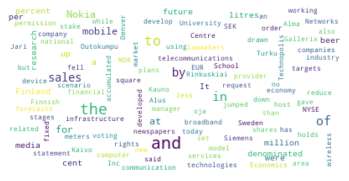

In [145]:
#neutral wordcloud

nu_txt = text_nu['Text'].values
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=20, 
                      max_words=10000,
                      stopwords ='english' , 
                      background_color="white").generate(str(text_nu['Text'].values))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("neutral_review.png")

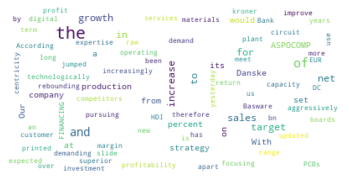

In [148]:
#positive wordcloud
pos_txt = text_pos['Text'].values
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=20, max_words=10000,stopwords ='english' ,
                      background_color="white").generate(str(text_pos['Text'].values ))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("positive_review.png")

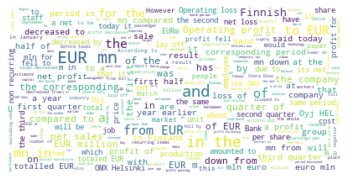

In [149]:
#positive wordcloud
neg_txt = text_neg['Text'].values
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=20, max_words=10000,stopwords ='english' ,
                      background_color="white").generate(str(text_neg['Text'].values ))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("negitive_review.png")

In [152]:
from sklearn import model_selection
X_Train, X_Test,y_Train, y_Test = model_selection.train_test_split(df_n['Text'], df_n['Type'],
                                                                   test_size=0.3)

#optional(neutral-0/positive-1/negative-2)
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y_Train = Encoder.fit_transform(y_Train)
y_Test = Encoder.fit_transform(y_Test)


from sklearn.feature_extraction.text import TfidfVectorizer
Tf_idf = TfidfVectorizer()
Tf_idf.fit(df_n['Text'])

train_X_Tfidf = Tf_idf.transform(X_Train)
test_X_Tfidf = Tf_idf.transform(X_Test)

print(train_X_Tfidf)
train_X_Tfidf.shape

  (0, 8730)	0.3467042274825576
  (0, 7880)	0.2094367006033738
  (0, 7836)	0.27605400377155015
  (0, 6212)	0.3307164785202534
  (0, 4718)	0.19885887975631208
  (0, 3950)	0.10647539702202286
  (0, 3685)	0.07044360817507715
  (0, 2967)	0.3307164785202534
  (0, 2963)	0.4852890126787906
  (0, 1451)	0.2426445063393953
  (0, 1224)	0.30338524114590176
  (0, 528)	0.1359583464954431
  (0, 215)	0.2832430595550151
  (1, 8928)	0.11365905977528509
  (1, 8896)	0.09934668657458075
  (1, 8439)	0.18367791874118652
  (1, 8083)	0.04737629338016281
  (1, 7451)	0.1688622525276188
  (1, 7180)	0.3390101264639932
  (1, 6958)	0.18088539287663083
  (1, 6833)	0.27846172104054273
  (1, 5116)	0.2260816448685566
  (1, 4656)	0.2618453937946472
  (1, 4104)	0.25768133772635204
  (1, 3985)	0.3108559105867721
  :	:
  (3388, 1478)	0.11025447322660956
  (3388, 1382)	0.25970536407496825
  (3388, 340)	0.07481898234141748
  (3389, 8189)	0.11144232177425538
  (3389, 8083)	0.07972996486516559
  (3389, 6185)	0.20687640680656852


(3391, 9081)

In [153]:
# fit the training dataset on the NB classifier
from sklearn import model_selection, naive_bayes
from sklearn.metrics import accuracy_score,confusion_matrix
Naive = naive_bayes.MultinomialNB()
Naive.fit(train_X_Tfidf,y_Train)

# predict the labels on validation dataset
predictions_NB = Naive.predict(test_X_Tfidf)


# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_Test)*100)

#use confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_Test,predictions_NB))


#crosstab
pd.crosstab(y_Test,predictions_NB)


#classification report
from sklearn.metrics import classification_report
target_names = ['Netural', 'Positive','Negative']
print(classification_report(y_Test,predictions_NB,target_names=target_names))

Naive Bayes Accuracy Score ->  68.56946354883081
Confusion Matrix
 [[ 10 113  48]
 [  0 862  22]
 [  0 274 125]]
              precision    recall  f1-score   support

     Netural       1.00      0.06      0.11       171
    Positive       0.69      0.98      0.81       884
    Negative       0.64      0.31      0.42       399

    accuracy                           0.69      1454
   macro avg       0.78      0.45      0.45      1454
weighted avg       0.71      0.69      0.62      1454



,Type,Text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
